In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import os, csv, re

In [8]:
%matplotlib inline
x = [0, 0.5, 0, -0.9]
y = [-0.9, -0.1, 0, 0]
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)

plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')


ValueError:     Error on input data

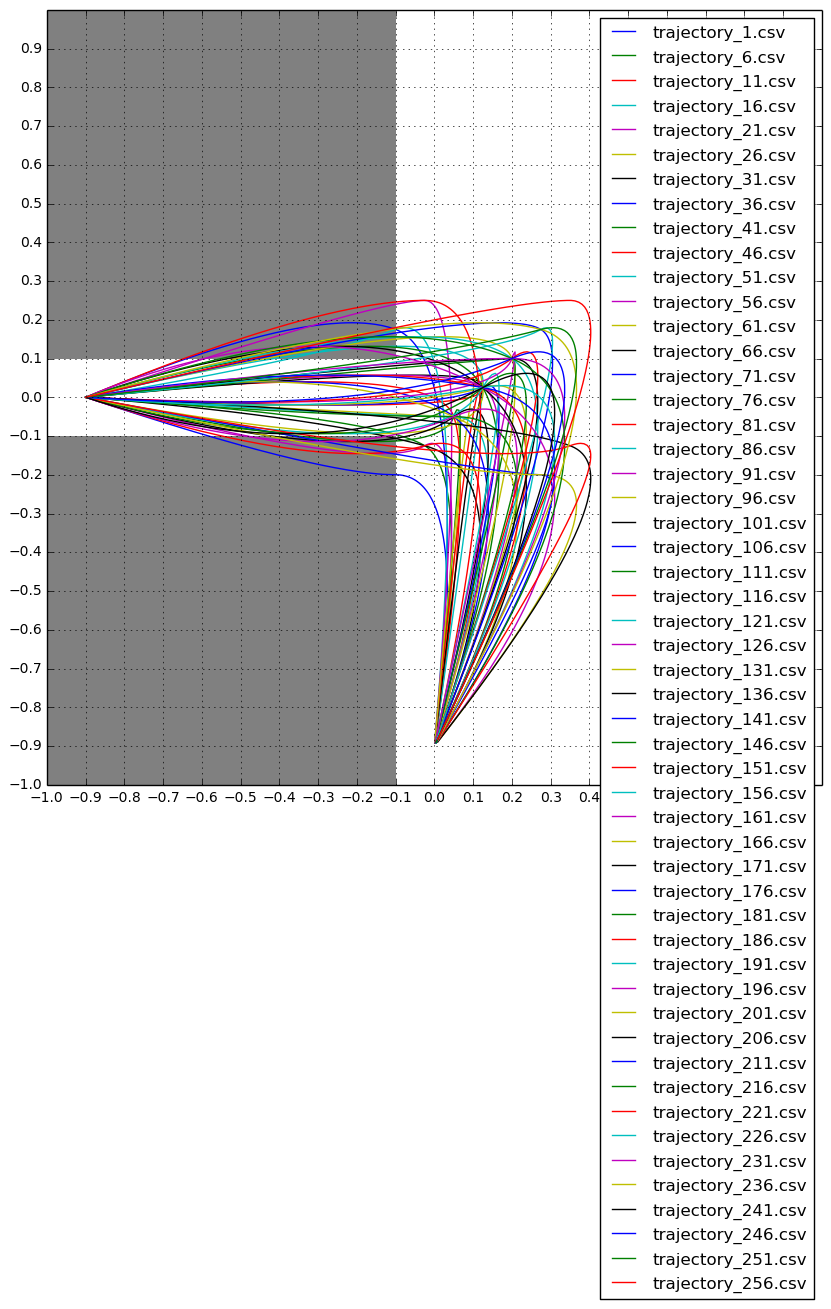

In [48]:
from matplotlib.path import Path
import matplotlib.patches as patches

for base, _, files in list(os.walk("../build/trajectories/")):
    limit = 30
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    verts1 = [
        (-1, -1), # left, bottom
        (-1, -.1), # left, top
        (-.1, -.1), # right, top
        (-.1, -1), # right, bottom
        (0., 0.), # ignored
        ]
    
    verts2 = [
        (-1, .1), # left, bottom
        (-1, 1), # left, top
        (-.1, 1), # right, top
        (-.1, .1), # right, bottom
        (0., 0.), # ignored
        ]

    codes = [Path.MOVETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.CLOSEPOLY,
             ]

    ax.add_patch(patches.PathPatch(Path(verts1, codes), facecolor='grey', lw=0))
    ax.add_patch(patches.PathPatch(Path(verts2, codes), facecolor='grey', lw=0))
    ax.set_xticks(np.arange(-1,1,0.1))
    ax.set_yticks(np.arange(-1,1,0.1))
    ax.grid()

    for filename in sorted(files, key=lambda f: int(re.findall('([0-9]+)', f)[0]))[::5]:
        xs = []
        ys = []
        with open(os.path.join(base, filename), "r") as csvfile:
            for line in csv.reader(csvfile):
                xs.append(float(line[6]))
                ys.append(float(line[7]))
                
        ax.plot(xs, ys, label=filename)
            
    ax.legend()